In [1]:
import pandas as pd 
import numpy as np
import itertools 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
orthogroups = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Orthology_Tables/Orthogroups.tsv', sep = '\t')
orthogroups

,Orthogroup,SlycHeinz4.0,Smel4.1,Solabu2_1.0.4,Solaet3_3.0.4,Solcan1_1.0.4,Solcle2_1.0.4,Soletu1_1.0.4,Solgig1_1.0.4,Sollin1_1.0.4,SollycM82_1.0.4,SollycSweet-100_2.0.4,Solmac3_3.0.4,Solmur2hap1_2.0.4,Solmur2hap2_2.0.4,Solpri1_2.0.4,Solqui2_2.0.4,Solrob1_1.0.4
0,OG0000000,NaN,"SMEL4.1_00g007950.1.01, SMEL4.1_00g008920.1.01...","Solabu2.01g007150.1, Solabu2.01g008630.1, Sola...","Solaet3.01g012880.1, Solaet3.01g015280.1, Sola...","Solcan1.01g001750.1, Solcan1.01g006400.1, Solc...","Solcle2.01g009770.1, Solcle2.01g020010.1, Solc...","Soletu1.01g012220.1, Soletu1.09g011190.1, Sole...","Solgig1.01g009290.1, Solgig1.01g010580.1, Solg...","Sollin1.01g004130.1, Sollin1.01g006120.1, Soll...",NaN,SollycSweet-100.02g006670.1,"Solmac3.01g004710.1, Solmac3.01g005730.1, Solm...","Solmur2hap1.03g007570.1, Solmur2hap1.04g010710...","Solmur2hap2.03g007770.1, Solmur2hap2.05g016120...","Solpri1.01g002060.1, Solpri1.01g010200.1, Solp...","Solqui2.01g004180.1, Solqui2.01g011410.1, Solq...","Solrob1.01g001070.1, Solrob1.01g007660.1, Solr..."
1,OG0000001,NaN,"SMEL4.1_00g001660.1.01, SMEL4.1_00g001710.1.01...","Solabu2.02g000030.1, Solabu2.02g000040.1, Sola...","Solaet3.02g000060.1, Solaet3.02g000410.1, Sola...","Solcan1.01g000150.1, Solcan1.ctg00000004g00003...","Solcle2.ctg00000001g000020.1, Solcle2.ctg00000...","Soletu1.ctg00000005g000010.1, Soletu1.ctg00000...","Solgig1.02g000010.1, Solgig1.02g000050.1, Solg...","Sollin1.02g000010.1, Sollin1.02g000050.1, Soll...","SollycM82.ctg00000028g000020.1, SollycM82.ctg0...","SollycSweet-100.ctg00000007g000060.1, SollycSw...","Solmac3.02g000350.1, Solmac3.02g000560.1, Solm...","Solmur2hap1.02g000070.1, Solmur2hap1.02g000320...","Solmur2hap2.02g000010.1, Solmur2hap2.02g000070...","Solpri1.02g000030.1, Solpri1.02g000140.1, Solp...","Solqui2.02g034670.1, Solqui2.09g017150.1, Solq...","Solrob1.02g026320.1, Solrob1.02g035130.1, Solr..."
2,OG0000002,NaN,"SMEL4.1_00g001730.1.01, SMEL4.1_00g002590.1.01...","Solabu2.02g000170.1, Solabu2.02g000320.1, Sola...","Solaet3.02g000330.1, Solaet3.02g000430.1, Sola...","Solcan1.ctg00000004g000010.1, Solcan1.ctg00000...","Solcle2.02g000020.1, Solcle2.02g000040.1, Solc...","Soletu1.ctg00000074g000010.1, Soletu1.ctg00000...","Solgig1.02g000030.1, Solgig1.ctg00000001g00004...","Sollin1.02g000030.1, Sollin1.02g000110.1, Soll...","SollycM82.ctg00000420g000010.1, SollycM82.ctg0...","SollycSweet-100.ctg00000006g000010.1, SollycSw...","Solmac3.02g000140.1, Solmac3.02g000380.1, Solm...","Solmur2hap1.02g000030.1, Solmur2hap1.02g000040...","Solmur2hap2.02g000030.1, Solmur2hap2.02g000130...","Solpri1.01g010730.1, Solpri1.01g011910.1, Solp...","Solqui2.09g017170.1, Solqui2.ctg00000062g00001...","Solrob1.02g026300.1, Solrob1.02g034570.1, Solr..."
3,OG0000003,Solyc02g004000.1.1,"SMEL4.1_00g001580.1.01, SMEL4.1_00g001670.1.01...","Solabu2.02g000050.1, Solabu2.02g000080.1, Sola...","Solaet3.02g000070.1, Solaet3.02g000130.1, Sola...","Solcan1.ctg00000007g000030.1, Solcan1.ctg00000...","Solcle2.11g017400.1, Solcle2.ctg00000002g00002...","Soletu1.ctg00000005g000030.1, Soletu1.ctg00000...","Solgig1.02g000020.1, Solgig1.02g000060.1, Solg...","Sollin1.02g000020.1, Sollin1.02g000060.1, Soll...","SollycM82.ctg00000029g000010.1, SollycM82.ctg0...","SollycSweet-100.ctg00000002g000010.1, SollycSw...","Solmac3.02g000130.1, Solmac3.02g000430.1, Solm...","Solmur2hap1.02g000050.1, Solmur2hap1.02g000100...","Solmur2hap2.02g000020.1, Solmur2hap2.02g000080...","Solpri1.01g010660.1, Solpri1.02g000040.1, Solp...","Solqui2.02g034690.1, Solqui2.09g017160.1, Solq...","Solrob1.02g026310.1, Solrob1.02g034470.1, Solr..."
4,OG0000004,NaN,"SMEL4.1_00g006210.1.01, SMEL4.1_08g009900.1.01...",NaN,"Solaet3.02g000010.1, Solaet3.02g000630.1, Sola...","Solcan1.01g000130.1, Solcan1.ctg00000000g00002...","Solcle2.ctg00000073g000010.1, Solcle2.ctg00000...","Soletu1.08g005110.1, Soletu1.11g002430.1, Sole...","Solgig1.02g000070.1, Solgig1.ctg00000001g00013...","Sollin1.ctg00000005g000020.1, Sollin1.ctg00000...","SollycM82.ctg000001

In [3]:
quitoense_table = orthogroups[['Orthogroup','Solqui2_2.0.4']]
quitoense_table = quitoense_table.dropna()
quitoense_table

,Orthogroup,Solqui2_2.0.4
0,OG0000000,"Solqui2.01g004180.1, Solqui2.01g011410.1, Solq..."
1,OG0000001,"Solqui2.02g034670.1, Solqui2.09g017150.1, Solq..."
2,OG0000002,"Solqui2.09g017170.1, Solqui2.ctg00000062g00001..."
3,OG0000003,"Solqui2.02g034690.1, Solqui2.09g017160.1, Solq..."
4,OG0000004,"Solqui2.11g021290.1, Solqui2.ctg00000097g00001..."
...,...,...
44941,OG0044941,Solqui2.12g007080.1
44942,OG0044942,Solqui2.12g008170.1
44943,OG0044943,Solqui2.12g021870.1
44944,OG0044944,Solqui2.ctg00000562g000010.1


In [4]:
len(quitoense_table['Solqui2_2.0.4'][0].replace(" ",'').split(','))

79

In [5]:
df_conversion_base = []
list_of_lenghts = []
for Orthogroup_row in quitoense_table.iterrows():
    current_orthogroup = Orthogroup_row[1][0]
    current_list_of_genes_in_group = Orthogroup_row[1][1].replace(" ",'').split(',')
    list_of_lenghts.append(len(current_list_of_genes_in_group))
    if len(current_list_of_genes_in_group) >2 or len(current_list_of_genes_in_group) == 1:
        continue
    orthogroup_list = [current_orthogroup]*len(current_list_of_genes_in_group)
    zipped_list = zip(orthogroup_list, current_list_of_genes_in_group)
    df_conversion_base.extend(list(zipped_list))


Text(0.5, 1.0, 'Current Threshold is 31')

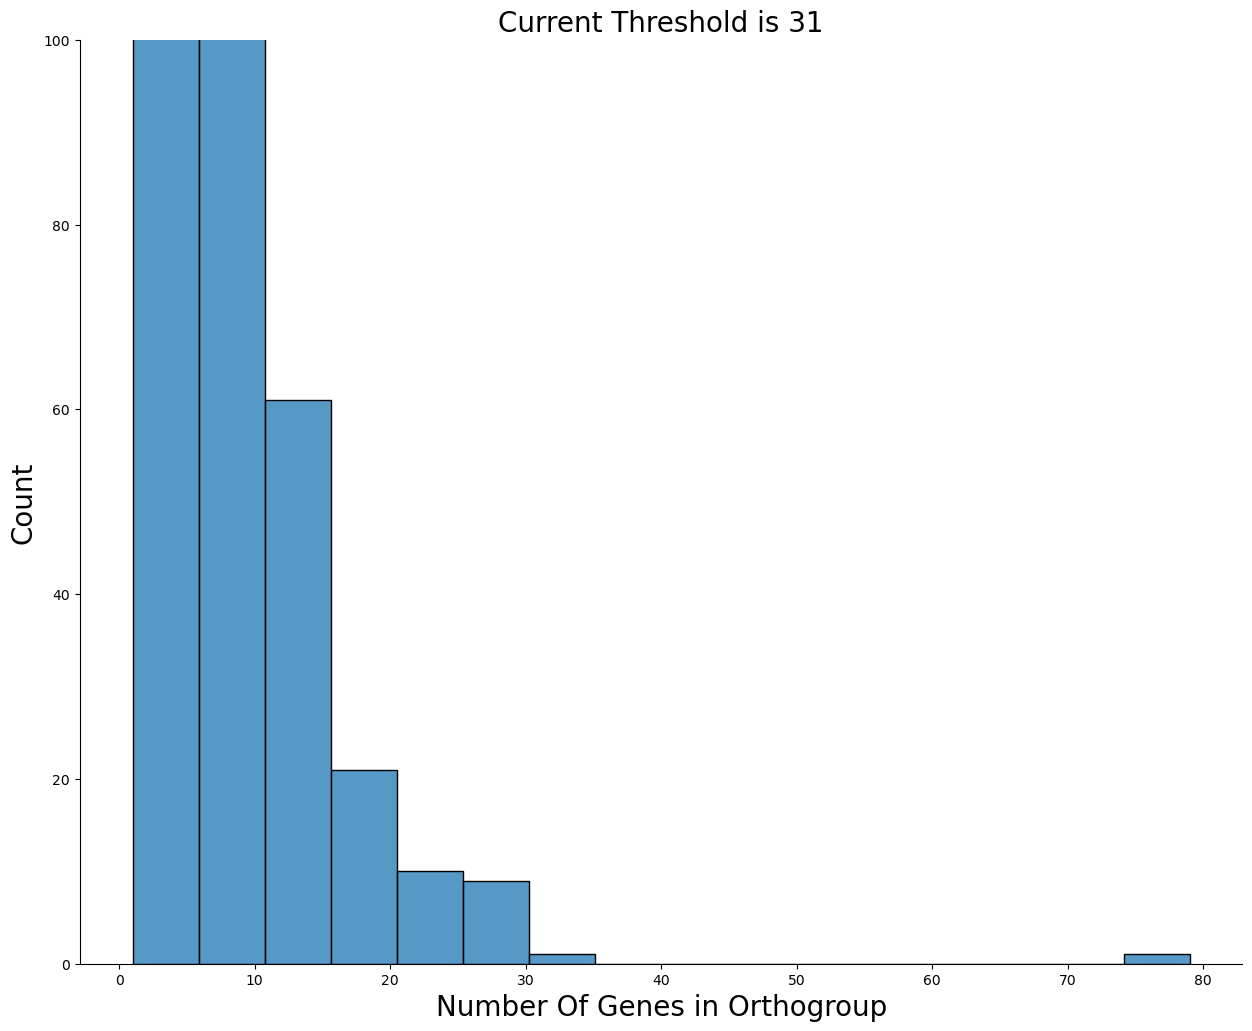

In [6]:
fig, ax = plt.subplots(figsize = (15,12))
fig.patch.set_facecolor('white')
ax = sns.histplot( x =list_of_lenghts,)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Number Of Genes in Orthogroup", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,100))
plt.ylim((0,100))
plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [7]:
quitoense_long_df = pd.DataFrame(data=df_conversion_base, columns = ['Orthogroup','Gene'])
quitoense_long_df

,Orthogroup,Gene
0,OG0000022,Solqui2.ctg00000165g000010.1
1,OG0000022,Solqui2.ctg00000452g000020.1
2,OG0000083,Solqui2.ctg00000598g000050.1
3,OG0000083,Solqui2.ctg00000598g000060.1
4,OG0000090,Solqui2.01g005200.1
...,...,...
5601,OG0044937,Solqui2.12g014290.1
5602,OG0044940,Solqui2.12g006340.1
5603,OG0044940,Solqui2.12g006350.1
5604,OG0044945,Solqui2.ctg00000737g000090.1


In [8]:
quitoense_long_df.loc[quitoense_long_df['Orthogroup'] == 'OG0044943']

,Orthogroup,Gene


In [9]:
current_list_of_genes_in_group

['Solqui2.ctg00000737g000090.1', 'Solqui2.ctg00000737g000100.1']

In [10]:
list_of_gene_pairs_in_ortho_group = []
for ortho in set(quitoense_long_df['Orthogroup']):
    matched_long_df = quitoense_long_df.loc[quitoense_long_df['Orthogroup'] == ortho]
    all_combinations_in_orthogroup = list(itertools.combinations(matched_long_df['Gene'].to_list(),2))
    list_of_gene_pairs_in_ortho_group.extend(all_combinations_in_orthogroup)

In [11]:
ortho_gene_pairs_df = pd.DataFrame(data=  list_of_gene_pairs_in_ortho_group, columns = ['Alpha Gene','Beta Gene'])
ortho_gene_pairs_df

,Alpha Gene,Beta Gene
0,Solqui2.03g007590.1,Solqui2.08g012440.1
1,Solqui2.04g007380.1,Solqui2.07g017520.1
2,Solqui2.03g026250.1,Solqui2.04g025730.1
3,Solqui2.01g017200.1,Solqui2.10g012960.1
4,Solqui2.06g016860.1,Solqui2.06g016910.1
...,...,...
2798,Solqui2.02g014070.1,Solqui2.11g018450.1
2799,Solqui2.05g020580.1,Solqui2.11g007330.1
2800,Solqui2.08g000180.1,Solqui2.08g003570.1
2801,Solqui2.09g028560.1,Solqui2.09g028600.1


In [12]:
normalized_combined_sample = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Quitoense/fpkm_normalized_combined_samples.tsv', sep = '\t', index_col= 0)


In [13]:
normalized_combined_sample.index = normalized_combined_sample.index+".1"

In [14]:
normalized_combined_sample['Mean'] = normalized_combined_sample.mean(axis =1)
normalized_combined_sample

,Rep 1,Rep 2,Mean
FEATURE_ID,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754
Solqui2.Cg000020.1,0.088258,0.122627,0.105443
Solqui2.Cg000030.1,0.000000,0.000000,0.000000
ncRNA_Solqui2.Cg003561.1,0.000000,0.000000,0.000000
Solqui2.Cg000040.1,0.000000,0.000000,0.000000
...,...,...,...
Solqui2.ctg00000757g000020.1,0.000000,0.000000,0.000000
Solqui2.ctg00000760g000010.1,1.124269,0.052069,0.588169
Solqui2.ctg00000762g000010.1,0.000000,0.000000,0.000000


In [15]:
quitoense_exploration_of_btw_rep_variance = normalized_combined_sample.copy()
quitoense_exploration_of_btw_rep_variance['Rep Difference'] = quitoense_exploration_of_btw_rep_variance['Rep 1'] - quitoense_exploration_of_btw_rep_variance['Rep 2']

In [16]:
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Mean,Rep Difference
FEATURE_ID,,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754,0.126143
Solqui2.Cg000020.1,0.088258,0.122627,0.105443,-0.034370
Solqui2.Cg000030.1,0.000000,0.000000,0.000000,0.000000
ncRNA_Solqui2.Cg003561.1,0.000000,0.000000,0.000000,0.000000
Solqui2.Cg000040.1,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
Solqui2.ctg00000757g000020.1,0.000000,0.000000,0.000000,0.000000
Solqui2.ctg00000760g000010.1,1.124269,0.052069,0.588169,1.072200
Solqui2.ctg00000762g000010.1,0.000000,0.000000,0.000000,0.000000


In [17]:
quitoense_exploration_of_btw_rep_variance = quitoense_exploration_of_btw_rep_variance.replace(0,np.nan)
quitoense_exploration_of_btw_rep_variance = quitoense_exploration_of_btw_rep_variance.dropna(subset = ['Rep 1','Rep 2'], how = 'all')
quitoense_exploration_of_btw_rep_variance = quitoense_exploration_of_btw_rep_variance.replace(np.nan, 0)
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Mean,Rep Difference
FEATURE_ID,,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754,0.126143
Solqui2.Cg000020.1,0.088258,0.122627,0.105443,-0.034370
Solqui2.Cg000050.1,0.186422,0.621646,0.404034,-0.435224
Solqui2.Cg000060.1,0.101622,0.169435,0.135528,-0.067813
Solqui2.Cg000070.1,0.537335,0.656994,0.597164,-0.119660
...,...,...,...,...
Solqui2.ctg00000691g000010.1,0.023048,0.076856,0.049952,-0.053808
ncRNA_Solqui2.ctg00000739g003721.1,4.515794,0.721979,2.618887,3.793815
ncRNA_Solqui2.ctg00000739g003731.1,0.056387,0.000000,0.028193,0.056387


In [18]:
quitoense_exploration_of_btw_rep_variance.max()

Rep 1             14176.429052
Rep 2             23976.249904
Mean              19076.339478
Rep Difference     3315.433492
dtype: float64

In [19]:
quitoense_exploration_of_btw_rep_variance.median()

Rep 1             7.892130
Rep 2             7.615160
Mean              8.020551
Rep Difference    0.076655
dtype: float64

In [20]:
np.percentile(quitoense_exploration_of_btw_rep_variance['Rep Difference'], 95)

16.530548768263195

(0.0, 1250.0)

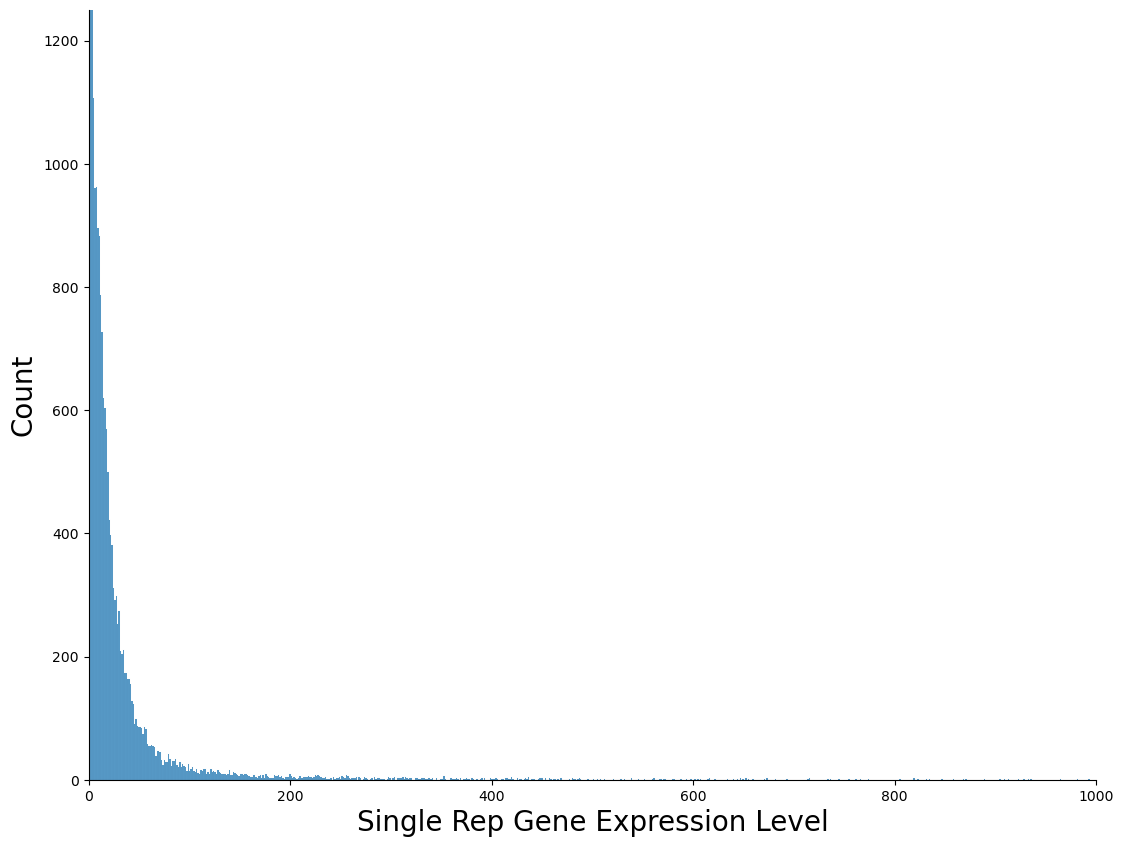

In [21]:
fig, ax = plt.subplots(figsize = (13,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = quitoense_exploration_of_btw_rep_variance, x = 'Rep 1',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Single Rep Gene Expression Level", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,1000))
plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

(0.0, 1250.0)

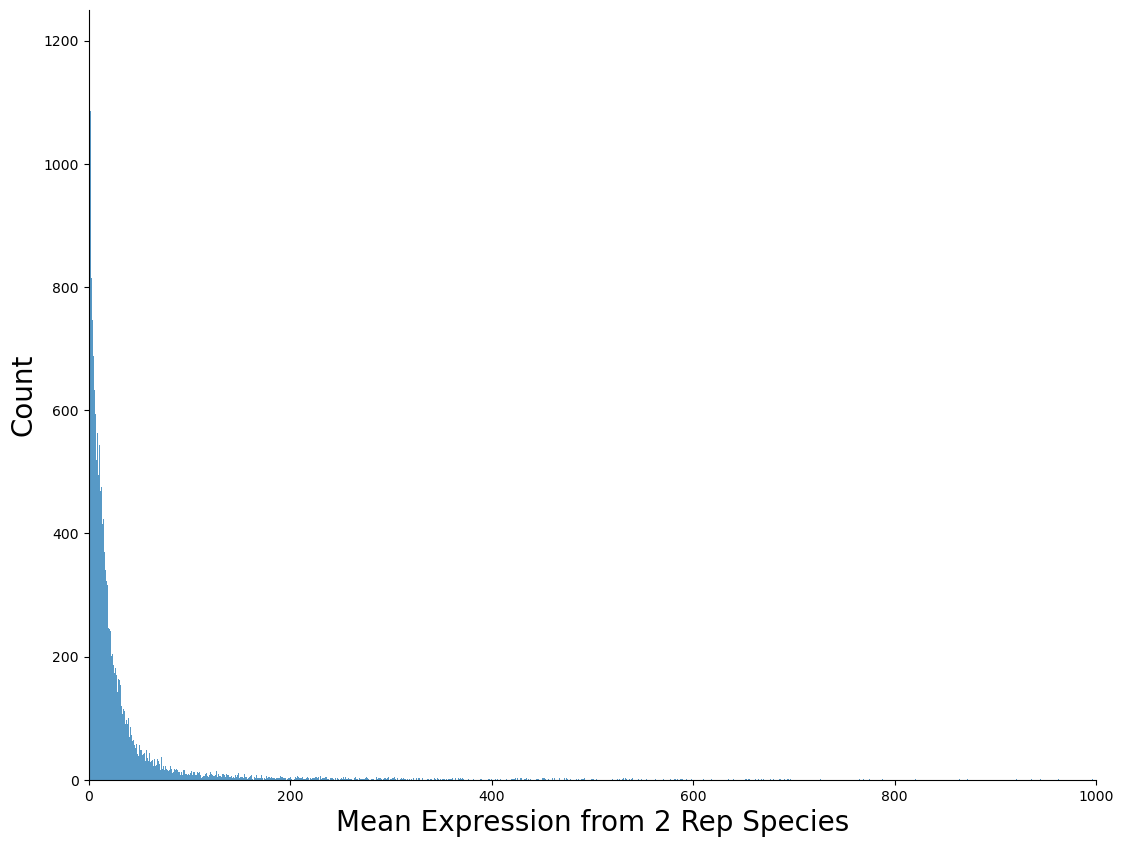

In [22]:
fig, ax = plt.subplots(figsize = (13,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = normalized_combined_sample, x = 'Mean',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Mean Expression from 2 Rep Species", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,1000))
plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [23]:
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Mean,Rep Difference
FEATURE_ID,,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754,0.126143
Solqui2.Cg000020.1,0.088258,0.122627,0.105443,-0.034370
Solqui2.Cg000050.1,0.186422,0.621646,0.404034,-0.435224
Solqui2.Cg000060.1,0.101622,0.169435,0.135528,-0.067813
Solqui2.Cg000070.1,0.537335,0.656994,0.597164,-0.119660
...,...,...,...,...
Solqui2.ctg00000691g000010.1,0.023048,0.076856,0.049952,-0.053808
ncRNA_Solqui2.ctg00000739g003721.1,4.515794,0.721979,2.618887,3.793815
ncRNA_Solqui2.ctg00000739g003731.1,0.056387,0.000000,0.028193,0.056387


(0.0, 300.0)

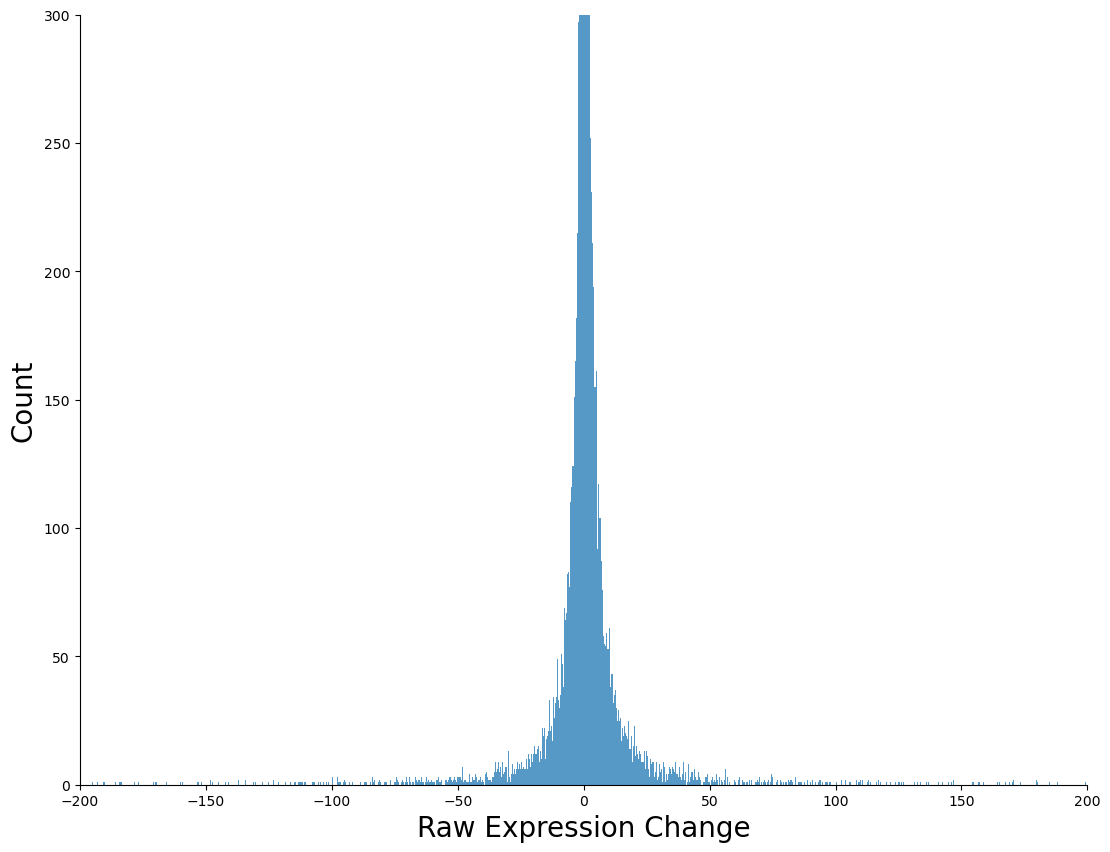

In [24]:
fig, ax = plt.subplots(figsize = (13,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = quitoense_exploration_of_btw_rep_variance, x = 'Rep Difference',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Raw Expression Change", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((-200,200))
plt.ylim((0, 300))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [25]:
quitoense_exploration_of_btw_rep_variance['Genes Averaged'] = quitoense_exploration_of_btw_rep_variance[['Rep 1','Rep 2']].mean(axis =1)
quitoense_exploration_of_btw_rep_variance['Percent Change'] = (quitoense_exploration_of_btw_rep_variance['Genes Averaged']/quitoense_exploration_of_btw_rep_variance['Rep Difference'])*100
quitoense_exploration_of_btw_rep_variance['Log2 Fold Change'] = np.log2((quitoense_exploration_of_btw_rep_variance['Rep 1']+1))-np.log2((quitoense_exploration_of_btw_rep_variance['Rep 2']+1))

In [26]:
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Mean,Rep Difference,Genes Averaged,Percent Change,Log2 Fold Change
FEATURE_ID,,,,,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754,0.126143,0.091754,72.737972,0.166877
Solqui2.Cg000020.1,0.088258,0.122627,0.105443,-0.034370,0.105443,-306.791104,-0.044859
Solqui2.Cg000050.1,0.186422,0.621646,0.404034,-0.435224,0.404034,-92.833673,-0.450841
Solqui2.Cg000060.1,0.101622,0.169435,0.135528,-0.067813,0.135528,-199.856308,-0.086182
Solqui2.Cg000070.1,0.537335,0.656994,0.597164,-0.119660,0.597164,-499.052724,-0.108137
...,...,...,...,...,...,...,...
Solqui2.ctg00000691g000010.1,0.023048,0.076856,0.049952,-0.053808,0.049952,-92.833673,-0.073952
ncRNA_Solqui2.ctg00000739g003721.1,4.515794,0.721979,2.618887,3.793815,2.618887,69.030423,1.679501
ncRNA_Solqui2.ctg00000739g003731.1,0.056387,0.000000,0.028193,0.056387,0.028193,50.000000,0.079138


In [33]:
quitoense_exploration_of_btw_rep_variance.loc[(quitoense_exploration_of_btw_rep_variance['Percent Change']<-940)&(quitoense_exploration_of_btw_rep_variance['Percent Change']>-960)]

,Rep 1,Rep 2,Mean,Rep Difference,Genes Averaged,Percent Change,Log2 Fold Change
FEATURE_ID,,,,,,,
Solqui2.Cg000110.1,0.114661,0.127450,0.121056,-0.012789,0.121056,-946.561283,-0.016458
Solqui2.Cg000880.1,0.056973,0.063328,0.060150,-0.006355,0.060150,-946.561283,-0.008648
Solqui2.Mg001370.1,0.511270,0.568296,0.539783,-0.057026,0.539783,-946.561283,-0.053436
Solqui2.Mg001540.1,0.049377,0.054884,0.052130,-0.005507,0.052130,-946.561283,-0.007552
Solqui2.Mg001680.1,0.117111,0.130174,0.123643,-0.013062,0.123643,-946.561283,-0.016771
...,...,...,...,...,...,...,...
Solqui2.12g018550.1,1.755867,1.951712,1.853789,-0.195845,1.853789,-946.561283,-0.099046
Solqui2.12g020050.1,0.086928,0.096624,0.091776,-0.009696,0.091776,-946.561283,-0.012812
Solqui2.12g022320.1,0.052599,0.058466,0.055532,-0.005867,0.055532,-946.561283,-0.008019


(0.0, 2500.0)

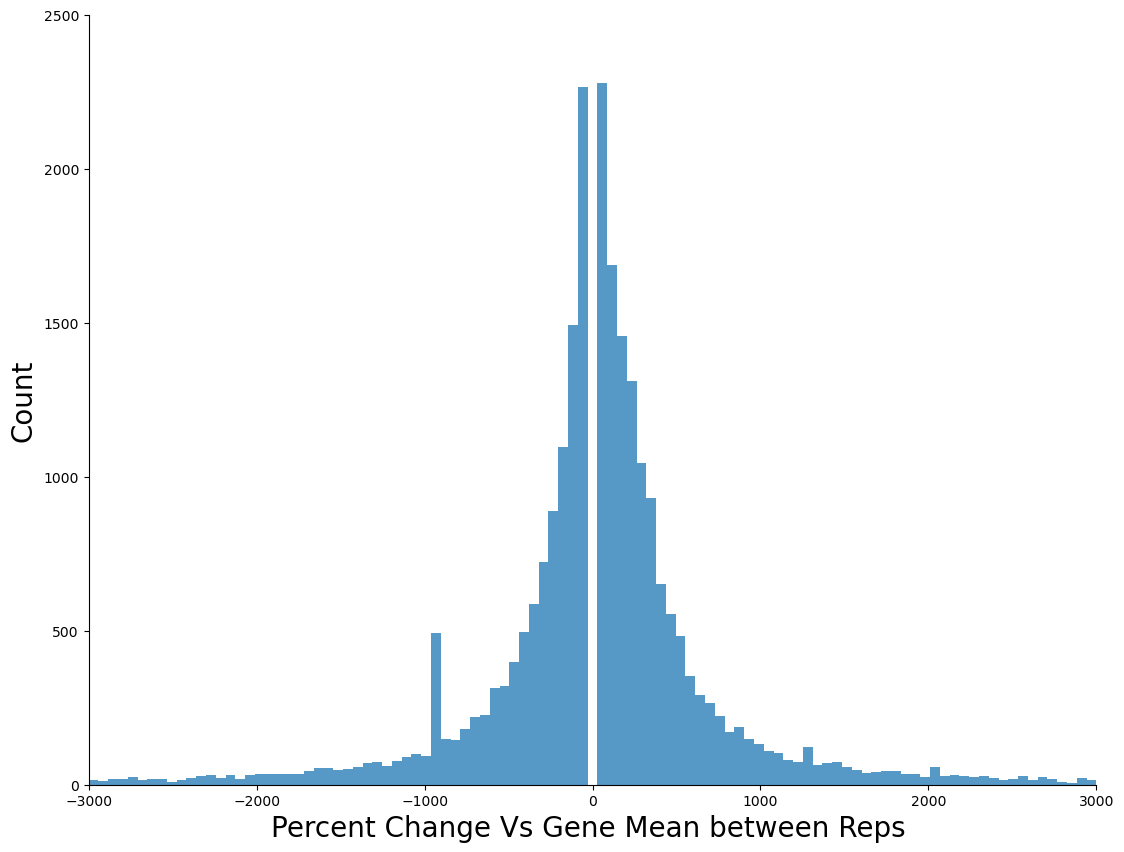

In [57]:
fig, ax = plt.subplots(figsize = (13,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = quitoense_exploration_of_btw_rep_variance, x = 'Percent Change', bins = 90000)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Percent Change Vs Gene Mean between Reps ", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((-3000,3000))
plt.ylim((0, 2500))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

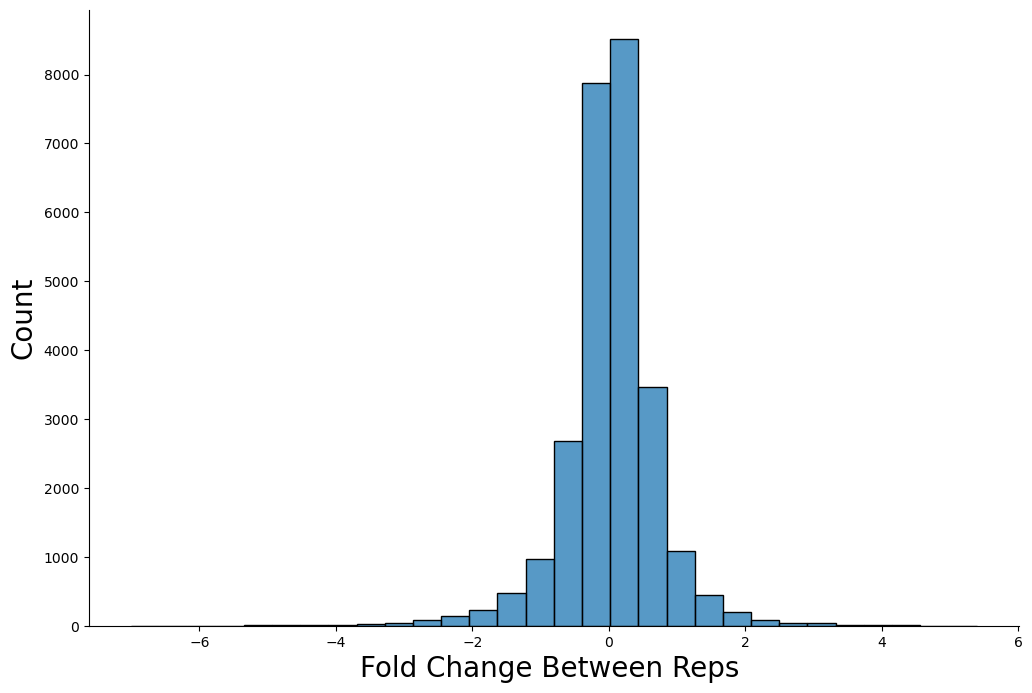

In [58]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = quitoense_exploration_of_btw_rep_variance, x = 'Log2 Fold Change', bins = 30)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Fold Change Between Reps ", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [38]:
ortho_gene_pairs_df

,Alpha Gene,Beta Gene
0,Solqui2.03g007590.1,Solqui2.08g012440.1
1,Solqui2.04g007380.1,Solqui2.07g017520.1
2,Solqui2.03g026250.1,Solqui2.04g025730.1
3,Solqui2.01g017200.1,Solqui2.10g012960.1
4,Solqui2.06g016860.1,Solqui2.06g016910.1
...,...,...
2798,Solqui2.02g014070.1,Solqui2.11g018450.1
2799,Solqui2.05g020580.1,Solqui2.11g007330.1
2800,Solqui2.08g000180.1,Solqui2.08g003570.1
2801,Solqui2.09g028560.1,Solqui2.09g028600.1


In [39]:
normalized_combined_sample

,Rep 1,Rep 2,Mean
FEATURE_ID,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754
Solqui2.Cg000020.1,0.088258,0.122627,0.105443
Solqui2.Cg000030.1,0.000000,0.000000,0.000000
ncRNA_Solqui2.Cg003561.1,0.000000,0.000000,0.000000
Solqui2.Cg000040.1,0.000000,0.000000,0.000000
...,...,...,...
Solqui2.ctg00000757g000020.1,0.000000,0.000000,0.000000
Solqui2.ctg00000760g000010.1,1.124269,0.052069,0.588169
Solqui2.ctg00000762g000010.1,0.000000,0.000000,0.000000


In [40]:
merged_alpha_gene =ortho_gene_pairs_df.merge(right = normalized_combined_sample[['Mean']], left_on = 'Alpha Gene',right_index= True)


In [41]:
merged_alpha_gene = merged_alpha_gene.rename(columns = {'Mean':'Alpha Gene Mean Expression'})
merged_alpha_gene

,Alpha Gene,Beta Gene,Alpha Gene Mean Expression
0,Solqui2.03g007590.1,Solqui2.08g012440.1,34.960965
1,Solqui2.04g007380.1,Solqui2.07g017520.1,123.329171
2,Solqui2.03g026250.1,Solqui2.04g025730.1,1.296011
3,Solqui2.01g017200.1,Solqui2.10g012960.1,0.000000
4,Solqui2.06g016860.1,Solqui2.06g016910.1,175.836929
...,...,...,...
2798,Solqui2.02g014070.1,Solqui2.11g018450.1,5.258641
2799,Solqui2.05g020580.1,Solqui2.11g007330.1,16.447611
2800,Solqui2.08g000180.1,Solqui2.08g003570.1,55.284962
2801,Solqui2.09g028560.1,Solqui2.09g028600.1,0.168515


In [42]:
paralog_difference_dataframe = merged_alpha_gene.merge(right = normalized_combined_sample[['Mean']], left_on = 'Beta Gene',right_index= True)
paralog_difference_dataframe = paralog_difference_dataframe.rename(columns  = {'Mean':'Beta Gene Mean Expression'})
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Alpha Gene Mean Expression,Beta Gene Mean Expression
0,Solqui2.03g007590.1,Solqui2.08g012440.1,34.960965,20.945949
1,Solqui2.04g007380.1,Solqui2.07g017520.1,123.329171,0.067993
2,Solqui2.03g026250.1,Solqui2.04g025730.1,1.296011,0.529035
3,Solqui2.01g017200.1,Solqui2.10g012960.1,0.000000,9.170999
4,Solqui2.06g016860.1,Solqui2.06g016910.1,175.836929,391.544632
...,...,...,...,...
2798,Solqui2.02g014070.1,Solqui2.11g018450.1,5.258641,7.837910
2799,Solqui2.05g020580.1,Solqui2.11g007330.1,16.447611,16.630197
2800,Solqui2.08g000180.1,Solqui2.08g003570.1,55.284962,68.671110
2801,Solqui2.09g028560.1,Solqui2.09g028600.1,0.168515,0.587352


In [43]:
paralog_difference_dataframe['Rep Difference'] = paralog_difference_dataframe['Alpha Gene Mean Expression'] - paralog_difference_dataframe['Beta Gene Mean Expression']

In [44]:
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Alpha Gene Mean Expression,Beta Gene Mean Expression,Rep Difference
0,Solqui2.03g007590.1,Solqui2.08g012440.1,34.960965,20.945949,14.015016
1,Solqui2.04g007380.1,Solqui2.07g017520.1,123.329171,0.067993,123.261179
2,Solqui2.03g026250.1,Solqui2.04g025730.1,1.296011,0.529035,0.766976
3,Solqui2.01g017200.1,Solqui2.10g012960.1,0.000000,9.170999,-9.170999
4,Solqui2.06g016860.1,Solqui2.06g016910.1,175.836929,391.544632,-215.707704
...,...,...,...,...,...
2798,Solqui2.02g014070.1,Solqui2.11g018450.1,5.258641,7.837910,-2.579269
2799,Solqui2.05g020580.1,Solqui2.11g007330.1,16.447611,16.630197,-0.182586
2800,Solqui2.08g000180.1,Solqui2.08g003570.1,55.284962,68.671110,-13.386148
2801,Solqui2.09g028560.1,Solqui2.09g028600.1,0.168515,0.587352,-0.418837


In [45]:
paralog_difference_dataframe['Genes Averaged'] = paralog_difference_dataframe[['Alpha Gene Mean Expression','Beta Gene Mean Expression']].mean(axis =1)

In [46]:
paralog_difference_dataframe['Percent Change'] = (paralog_difference_dataframe['Genes Averaged']/paralog_difference_dataframe['Rep Difference'])*100

In [47]:
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Alpha Gene Mean Expression,Beta Gene Mean Expression,Rep Difference,Genes Averaged,Percent Change
0,Solqui2.03g007590.1,Solqui2.08g012440.1,34.960965,20.945949,14.015016,27.953457,199.453624
1,Solqui2.04g007380.1,Solqui2.07g017520.1,123.329171,0.067993,123.261179,61.698582,50.055161
2,Solqui2.03g026250.1,Solqui2.04g025730.1,1.296011,0.529035,0.766976,0.912523,118.976679
3,Solqui2.01g017200.1,Solqui2.10g012960.1,0.000000,9.170999,-9.170999,4.585499,-50.000000
4,Solqui2.06g016860.1,Solqui2.06g016910.1,175.836929,391.544632,-215.707704,283.690781,-131.516295
...,...,...,...,...,...,...,...
2798,Solqui2.02g014070.1,Solqui2.11g018450.1,5.258641,7.837910,-2.579269,6.548275,-253.881043
2799,Solqui2.05g020580.1,Solqui2.11g007330.1,16.447611,16.630197,-0.182586,16.538904,-9058.136617
2800,Solqui2.08g000180.1,Solqui2.08g003570.1,55.284962,68.671110,-13.386148,61.978036,-463.001291
2801,Solqui2.09g028560.1,Solqui2.09g028600.1,0.168515,0.587352,-0.418837,0.377934,-90.234157


(0.0, 600.0)

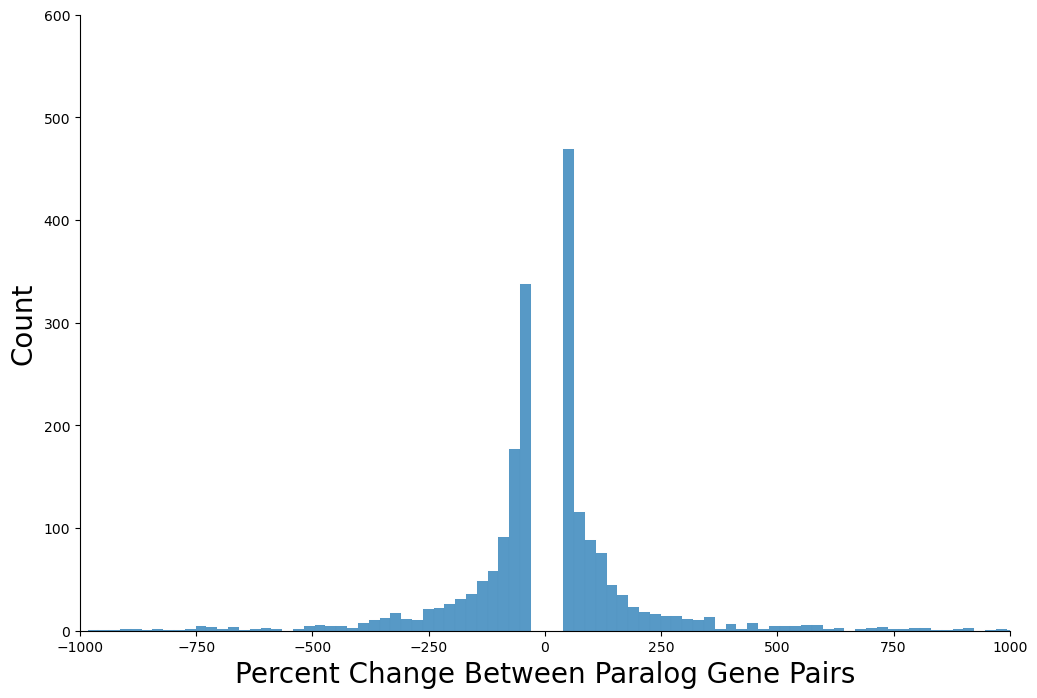

In [55]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = paralog_difference_dataframe, x = 'Percent Change',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Percent Change Between Paralog Gene Pairs", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((-1000,1000))
plt.ylim((0, 600))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [49]:
np.percentile(paralog_difference_dataframe['Percent Change'].dropna(), 85)

135.4650895968249

In [50]:
np.percentile(paralog_difference_dataframe['Rep Difference'], 95)

46.84208828529203

(0.0, 200.0)

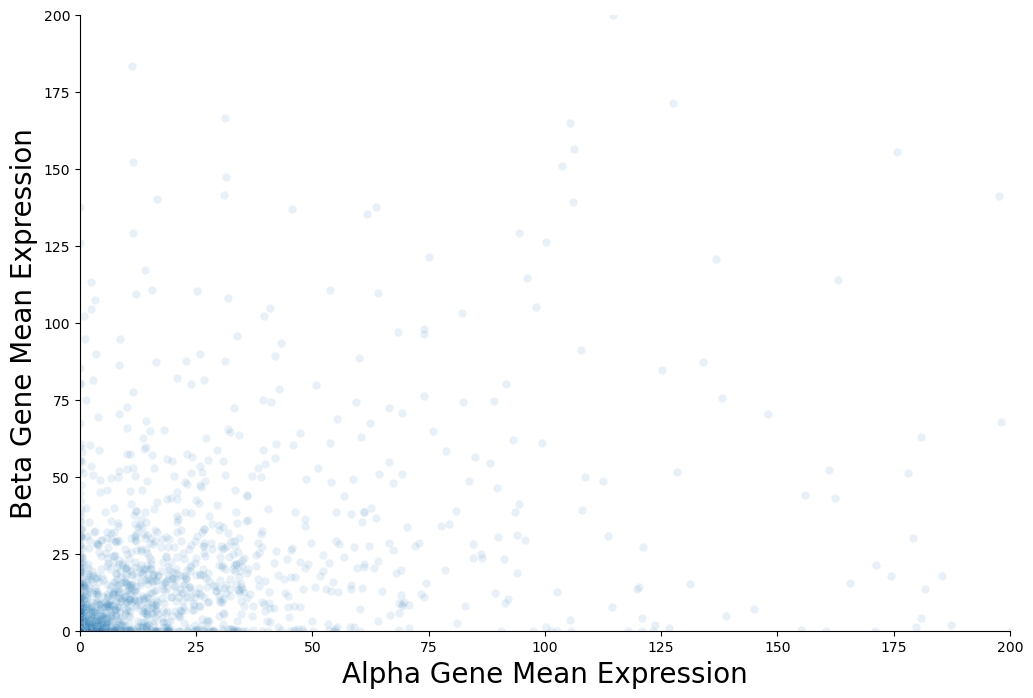

In [51]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(data = paralog_difference_dataframe, x = 'Alpha Gene Mean Expression', y = 'Beta Gene Mean Expression', alpha= .1)
plt.ylabel("Beta Gene Mean Expression", fontsize = 20)
plt.xlabel("Alpha Gene Mean Expression", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,200))
plt.ylim((0, 200))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

(0.0, 1500.0)

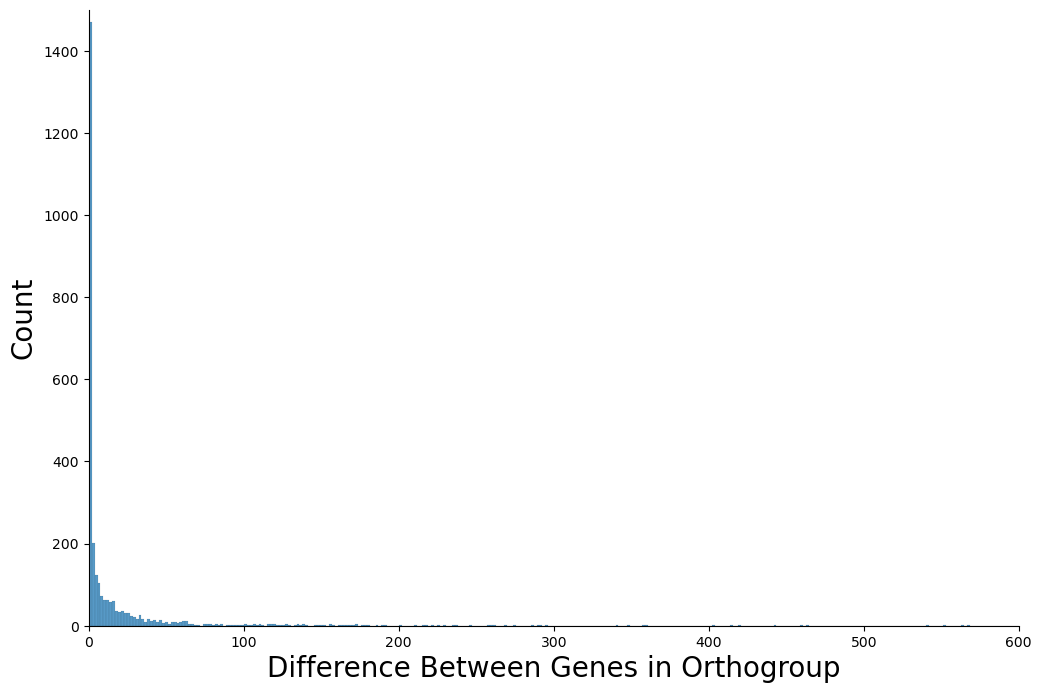

In [52]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(x = abs(paralog_difference_dataframe['Rep Difference']),)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Difference Between Genes in Orthogroup", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,600))
plt.ylim((0, 1500))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [53]:
paralog_difference_dataframe['Log2 Fold Change'] = np.log2((paralog_difference_dataframe['Alpha Gene Mean Expression']+1))-np.log2((paralog_difference_dataframe['Beta Gene Mean Expression']+1))

In [54]:
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Alpha Gene Mean Expression,Beta Gene Mean Expression,Rep Difference,Genes Averaged,Percent Change,Log2 Fold Change
0,Solqui2.03g007590.1,Solqui2.08g012440.1,34.960965,20.945949,14.015016,27.953457,199.453624,0.712477
1,Solqui2.04g007380.1,Solqui2.07g017520.1,123.329171,0.067993,123.261179,61.698582,50.055161,6.863120
2,Solqui2.03g026250.1,Solqui2.04g025730.1,1.296011,0.529035,0.766976,0.912523,118.976679,0.586508
3,Solqui2.01g017200.1,Solqui2.10g012960.1,0.000000,9.170999,-9.170999,4.585499,-50.000000,-3.346389
4,Solqui2.06g016860.1,Solqui2.06g016910.1,175.836929,391.544632,-215.707704,283.690781,-131.516295,-1.150437
...,...,...,...,...,...,...,...,...
2798,Solqui2.02g014070.1,Solqui2.11g018450.1,5.258641,7.837910,-2.579269,6.548275,-253.881043,-0.497856
2799,Solqui2.05g020580.1,Solqui2.11g007330.1,16.447611,16.630197,-0.182586,16.538904,-9058.136617,-0.015019
2800,Solqui2.08g000180.1,Solqui2.08g003570.1,55.284962,68.671110,-13.386148,61.978036,-463.001291,-0.307811
2801,Solqui2.09g028560.1,Solqui2.09g028600.1,0.168515,0.587352,-0.418837,0.377934,-90.234157,-0.441945


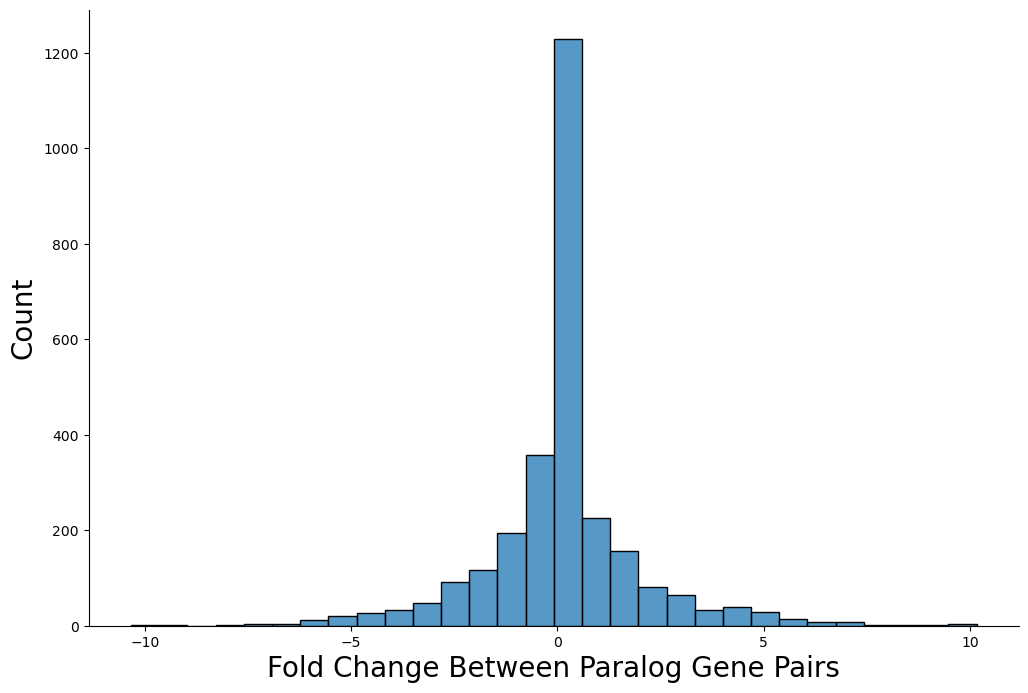

In [56]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = paralog_difference_dataframe, x = 'Log2 Fold Change', bins = 30)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Fold Change Between Paralog Gene Pairs", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [63]:
np.percentile(paralog_difference_dataframe['Log2 Fold Change'], 95)

3.306994914128837